# Project: Case study - Data Analytics Team

## Table of Contents
<ul>
<li><a href="#clean">Data Cleaning</a></li>
<li><a href="#calculating">Calculating KPIs</a></li>
<li><a href="#descriptives">Descriptives</a></li>
<li><a href="#memo">Writing a Memo</a></li>
</ul>

<a id='clean'></a>
## Data Cleaning

In [1]:
# importing necessary libraries and loading the datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


lesson_comp = pd.read_excel('/content/lesson_completion.xlsx')
pupil_attend = pd.read_excel('/content/pupil_attendance.xlsx')
scores = pd.read_excel('/content/pupil_scores.xlsx')
school = pd.read_excel('/content/school_information.xlsx')

Inspecting the first 5 rows of the dataframes

In [2]:
# Lesson completion dataframe or df
lesson_comp.head()

,school_id,teacher_id,grade,lesson_completion_rate
0,416,505,Grade 1,0.568401
1,416,202,Grade 2,0.680608
2,416,124,Grade 3,0.250460
3,416,516,Grade 4,0.359155
4,416,145,Grade 5,0.396761


In [3]:
# Pupil attendance df
pupil_attend.head()

,school_id,pupil_id,grade,attendance_records,present_records
0,35175,1,Grade 1,91,69
1,40580,7,Grade 2,92,86
2,9342,8,Grade 5,43,39
3,858450,10,Grade 5,86,62
4,792,13,Grade 3,104,81


In [4]:
# Pupil Scores df
scores.head()

,school_id,pupil_id,grade,subject,score
0,35175,1,Grade 1,Fluency,65.000000
1,35175,1,Grade 1,Kiswahili,0.942857
2,35175,1,Grade 1,Math,1.000000
3,40580,7,Grade 2,Math,0.933333
4,40580,7,Grade 2,Kiswahili,0.942857


Changing scores dataframe from long to wide data


In [5]:
scores = pd.pivot(scores, index=['school_id', 'pupil_id', 'grade'], columns='subject', values='score')

In [6]:
scores

subject                     Fluency  Kiswahili      Math
school_id pupil_id grade                                
416       344      Grade 2     41.0   0.600000  0.466667
          354      Grade 2     47.0   0.800000  0.633333
          1430     Grade 1     20.0   0.171429  0.400000
          1642     Grade 5     68.0   0.775000  0.680000
          1980     Grade 1     40.0   0.457143  1.000000
...                             ...        ...       ...
991980    25716    Grade 2    105.0   1.000000  0.761969
          26623    Grade 4    202.0   0.738017  0.620000
          26762    Grade 4    225.0   0.695856  0.480000
          26901    Grade 3    256.0   0.523312  1.000000
          27028    Grade 2     70.0   0.978238  0.908529

[12701 rows x 3 columns]

In [7]:
# School information df
school.head()

,region,province,school_id,tutoring_program
0,Mombasa,Coast,136992,No
1,Kilifi,Coast,687400,Yes
2,Mombasa,Coast,609982,Yes
3,Eastern,Eastern,223941,No
4,Isiolo,Eastern,34092,No


Creating pupil information dataframe with test scores, teacher completion rate, attendance, school information

In [8]:
# resetting multi level index to normal
scores = scores.reset_index()

In [9]:
scores

subject,school_id,pupil_id,grade,Fluency,Kiswahili,Math
0,416,344,Grade 2,41.0,0.600000,0.466667
1,416,354,Grade 2,47.0,0.800000,0.633333
2,416,1430,Grade 1,20.0,0.171429,0.400000
3,416,1642,Grade 5,68.0,0.775000,0.680000
4,416,1980,Grade 1,40.0,0.457143,1.000000
...,...,...,...,...,...,...
12696,991980,25716,Grade 2,105.0,1.000000,0.761969
12697,991980,26623,Grade 4,202.0,0.738017,0.620000
12698,991980,26762,Grade 4,225.0,0.695856,0.480000
12699,991980,26901,Grade 3,256.0,0.523312,1.000000


Merging Scores with Teacher Lesson Completion rate

In [10]:
pupil_info = scores.merge(lesson_comp, on=['school_id', 'grade'], how='left')

In [11]:
pupil_info

,school_id,pupil_id,grade,Fluency,Kiswahili,Math,teacher_id,lesson_completion_rate
0,416,344,Grade 2,41.0,0.600000,0.466667,202,0.680608
1,416,354,Grade 2,47.0,0.800000,0.633333,202,0.680608
2,416,1430,Grade 1,20.0,0.171429,0.400000,505,0.568401
3,416,1642,Grade 5,68.0,0.775000,0.680000,145,0.396761
4,416,1980,Grade 1,40.0,0.457143,1.000000,505,0.568401
...,...,...,...,...,...,...,...,...
12696,991980,25716,Grade 2,105.0,1.000000,0.761969,164,0.538023
12697,991980,26623,Grade 4,202.0,0.738017,0.620000,106,0.503650
12698,991980,26762,Grade 4,225.0,0.695856,0.480000,106,0.503650
12699,991980,26901,Grade 3,256.0,0.523312,1.000000,90,0.563536


Merging Scores and Teacher Lesson Completion rate with Pupil attendance records

In [12]:
pupil_info = pupil_info.merge(pupil_attend, on=['school_id', 'pupil_id', 'grade'], how='left')

In [13]:
pupil_info

,school_id,pupil_id,grade,Fluency,Kiswahili,Math,teacher_id,lesson_completion_rate,attendance_records,present_records
0,416,344,Grade 2,41.0,0.600000,0.466667,202,0.680608,85,77
1,416,354,Grade 2,47.0,0.800000,0.633333,202,0.680608,102,90
2,416,1430,Grade 1,20.0,0.171429,0.400000,505,0.568401,85,65
3,416,1642,Grade 5,68.0,0.775000,0.680000,145,0.396761,86,56
4,416,1980,Grade 1,40.0,0.457143,1.000000,505,0.568401,85,74
...,...,...,...,...,...,...,...,...,...,...
12696,991980,25716,Grade 2,105.0,1.000000,0.761969,164,0.538023,73,61
12697,991980,26623,Grade 4,202.0,0.738017,0.620000,106,0.503650,91,87
12698,991980,26762,Grade 4,225.0,0.695856,0.480000,106,0.503650,91,48
12699,991980,26901,Grade 3,256.0,0.523312,1.000000,90,0.563536,85,74


Merging Scores, Teacher Lesson Completion rate and Pupil attendance records with school information

In [14]:
pupil_info = pupil_info.merge(school, on='school_id', how='left')

In [15]:
pupil_info

,school_id,pupil_id,grade,Fluency,Kiswahili,Math,teacher_id,lesson_completion_rate,attendance_records,present_records,region,province,tutoring_program
0,416,344,Grade 2,41.0,0.600000,0.466667,202,0.680608,85,77,Kirinyaga,Central,No
1,416,354,Grade 2,47.0,0.800000,0.633333,202,0.680608,102,90,Kirinyaga,Central,No
2,416,1430,Grade 1,20.0,0.171429,0.400000,505,0.568401,85,65,Kirinyaga,Central,No
3,416,1642,Grade 5,68.0,0.775000,0.680000,145,0.396761,86,56,Kirinyaga,Central,No
4,416,1980,Grade 1,40.0,0.457143,1.000000,505,0.568401,85,74,Kirinyaga,Central,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12696,991980,25716,Grade 2,105.0,1.000000,0.761969,164,0.538023,73,61,Kilifi,Coast,Yes
12697,991980,26623,Grade 4,202.0,0.738017,0.620000,106,0.503650,91,87,Kilifi,Coast,Yes
12698,991980,26762,Grade 4,225.0,0.695856,0.480000,106,0.503650,91,48,Kilifi,Coast,Yes
12699,991980,26901,Grade 3,256.0,0.523312,1.000000,90,0.563536,85,74,Kilifi,Coast,Yes


In [16]:
pupil_info['grade'] = pupil_info['grade'].str[6:]

In [17]:
pupil_info.head()

,school_id,pupil_id,grade,Fluency,Kiswahili,Math,teacher_id,lesson_completion_rate,attendance_records,present_records,region,province,tutoring_program
0,416,344,2,41.0,0.600000,0.466667,202,0.680608,85,77,Kirinyaga,Central,No
1,416,354,2,47.0,0.800000,0.633333,202,0.680608,102,90,Kirinyaga,Central,No
2,416,1430,1,20.0,0.171429,0.400000,505,0.568401,85,65,Kirinyaga,Central,No
3,416,1642,5,68.0,0.775000,0.680000,145,0.396761,86,56,Kirinyaga,Central,No
4,416,1980,1,40.0,0.457143,1.000000,505,0.568401,85,74,Kirinyaga,Central,No


In [18]:
pupil_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12701 entries, 0 to 12700
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   school_id               12701 non-null  int64  
 1   pupil_id                12701 non-null  int64  
 2   grade                   12701 non-null  object 
 3   Fluency                 11976 non-null  float64
 4   Kiswahili               12101 non-null  float64
 5   Math                    12087 non-null  float64
 6   teacher_id              12701 non-null  int64  
 7   lesson_completion_rate  12701 non-null  float64
 8   attendance_records      12701 non-null  int64  
 9   present_records         12701 non-null  int64  
 10  region                  12701 non-null  object 
 11  province                12701 non-null  object 
 12  tutoring_program        12701 non-null  object 
dtypes: float64(4), int64(5), object(4)
memory usage: 1.4+ MB


Sending merged dataframes to a file

In [19]:
pupil_info.to_excel('pupil_masterfile.xlsx')

<a id='calculating'></a>
## Calculating KPIs

On general level

In [20]:
pupil_attend['present_percentage'] = (pupil_attend['present_records'] / pupil_attend['attendance_records']) * 100

In [21]:
pupil_attend['present_percentage'].describe()

count    12701.000000
mean        75.931743
std         17.842748
min          0.000000
25%         67.010309
50%         80.000000
75%         89.000000
max        100.000000
Name: present_percentage, dtype: float64

 The network-level average Percent Pupils Present is 75.93%

On schools level

In [22]:
pupil_attend.groupby('school_id')['present_percentage'].mean().sort_values()

school_id
166905    58.365569
30690     59.945117
168804    59.970305
46684     62.585229
858450    62.721614
            ...    
425124    85.171146
39078     85.390555
257904    85.416437
297076    85.453068
489918    90.730685
Name: present_percentage, Length: 111, dtype: float64

<a id='descriptives'></a>
## Descriptives

Average reading fluency scores across the 5 grades

In [23]:
average_score = pupil_info.groupby('grade')['Fluency'].mean()

In [24]:
average_score

grade
1     53.084650
2    104.396565
3    127.391393
4    145.473339
5    154.934010
Name: Fluency, dtype: float64

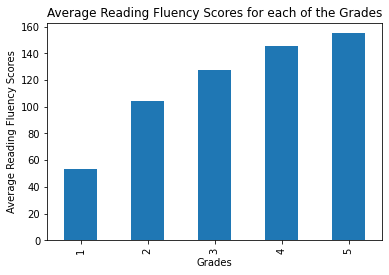

In [25]:
# plotting the results
%matplotlib inline
average_score.plot.bar();
plt.title('Average Reading Fluency Scores for each of the Grades')
plt.xlabel('Grades')
plt.ylabel('Average Reading Fluency Scores');

Regions that have the lowest and highest average fluency score across all grades

In [26]:
regions = pupil_info.sort_values(['Fluency'], ascending=False).groupby(['region', 'grade'])['Fluency'].mean()

In [27]:
# region with lowest reading fluency scores accross all grades
regions.head()

region  grade
Bomet   1        22.500000
        2        73.777778
        3        92.230769
        4        71.500000
        5        92.833333
Name: Fluency, dtype: float64

In [28]:
# region with highest reading fluency scores accross all grades
regions.tail()

region  grade
Vihiga  1         38.800000
        2         89.671233
        3        104.052632
        4        177.739130
        5        180.476190
Name: Fluency, dtype: float64

Bomet has the lowest average fluency score across all grades
Vihiga has the highest average fluency score across all grades


Share of pupils scoring under this threshold reading score of 10 for each grade

In [29]:
pupil_info['low_reading_score'] = [1 if x <= 10 else 0 for x in pupil_info['Fluency']]

In [30]:
low_reading = pupil_info.groupby('grade')['low_reading_score'].sum()

In [31]:
low_reading

grade
1    294
2     90
3     55
4     38
5     18
Name: low_reading_score, dtype: int64

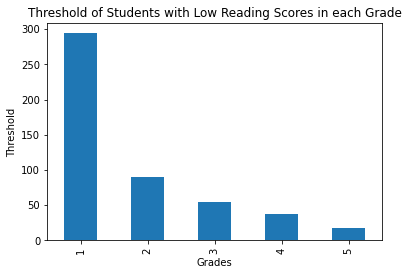

In [32]:
# plotting the results
low_reading.plot.bar();
plt.title('Threshold of Students with Low Reading Scores in each Grade')
plt.xlabel('Grades')
plt.ylabel('Threshold');

The school that has the highest share of pupils scoring under this threshold in grade 3

In [33]:
grade_3 = pupil_info.query('grade == "3"')

In [34]:
schools = grade_3.groupby(['school_id'])['low_reading_score'].sum().sort_values(ascending=False)

In [35]:
schools

school_id
223941    13
206948     5
46528      4
607904     3
8084       3
          ..
173720     0
168804     0
166905     0
165300     0
991980     0
Name: low_reading_score, Length: 111, dtype: int64

School with id 223941 has the highest number of students scoring under the threshold